# CIFAR-10 Dataset

In this notebook, I will build ConvNet to classify the images from the Cifar-10 dataset, available at http://www.cs.toronto.edu/~kriz/cifar.html. This dataset contains 60000 color images of 32\*32 pixels of 10 different classes :
- airplane										
- automobile										
- bird										
- cat										
- deer										
- dog										
- frog										
- horse										
- ship										
- truck

**reference** : Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10

/home/arthur/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('X shape :', x_train.shape)
print(len(x_train), 'train samples')
print(len(x_test), 'test samples')

X shape : (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
import matplotlib.pyplot as plt

In [4]:
labels = ['ariplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
label_decoder = {code:label for code, label in enumerate(labels)}

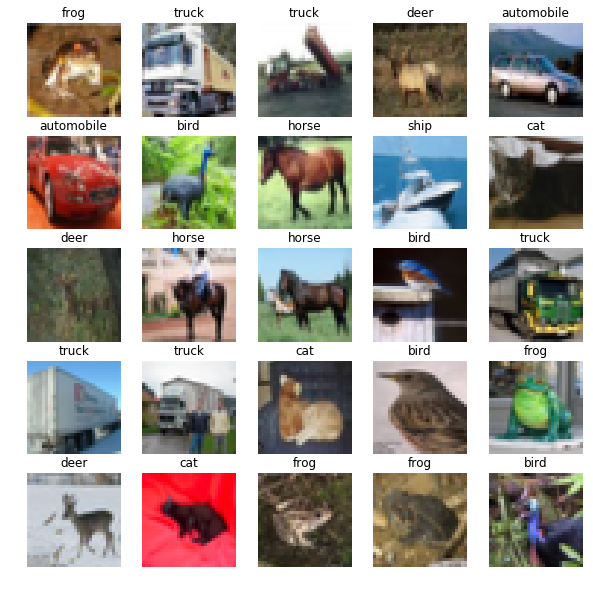

In [5]:
indexes = list(range(25))

fig, axes = plt.subplots(5,5)
fig.set_size_inches(10,10)
for index, ax in zip(indexes, axes.ravel()):
    ax.imshow(x_train[index])
    ax.set_title(label_decoder[y_train[index].item()])
    ax.axis('off')

### Preprocessing

In [6]:
x_train = x_train/255
x_test = x_test/255

n_y = 10
y_train = keras.utils.to_categorical(y_train, n_y)
y_test = keras.utils.to_categorical(y_test, n_y)

# Model 1
## Model inspired by LeNet-5, and using Dropout

- Y. LeCun et al., 1998, Gradient-Based Learning Applied to Document Recognition
- N. Srivastava et al., 2014, Dropout: A Simple Way to Prevent Neural Networks from Overfitting

In [7]:
input_shape = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_y, activation='softmax'))

In [8]:
model.compile('adam', keras.losses.categorical_crossentropy, ['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 250us/step - loss: 1.5299 - acc: 0.4413 - val_loss: 1.1827 - val_acc: 0.5751
Epoch 2/20
50000/50000 [==============================] - 11s 228us/step - loss: 1.0901 - acc: 0.6117 - val_loss: 0.9465 - val_acc: 0.6711
Epoch 3/20
50000/50000 [==============================] - 12s 234us/step - loss: 0.9218 - acc: 0.6737 - val_loss: 0.8318 - val_acc: 0.7076
Epoch 4/20
50000/50000 [==============================] - 12s 232us/step - loss: 0.8251 - acc: 0.7096 - val_loss: 0.7686 - val_acc: 0.7325
Epoch 5/20
50000/50000 [==============================] - 12s 233us/step - loss: 0.7491 - acc: 0.7366 - val_loss: 0.7296 - val_acc: 0.7461
Epoch 6/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.6957 - acc: 0.7555 - val_loss: 0.6977 - val_acc: 0.7626
Epoch 7/20
50000/50000 [==============================] - 11s 223us/step - loss: 0.6411 - acc: 0.7733 - val_loss: 0.

# Model 2
## Adding more dropout rate after each convolution layer.

In [9]:
input_shape = x_train.shape[1:]
n_y = 10

model2 = Sequential()

model2.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, activation='relu'))
model2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2), strides=2))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2), strides=2))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(n_y, activation='softmax'))

model2.compile('adam', keras.losses.categorical_crossentropy, ['accuracy'])
model2.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 232us/step - loss: 1.5911 - acc: 0.4198 - val_loss: 1.2143 - val_acc: 0.5649
Epoch 2/20
50000/50000 [==============================] - 11s 222us/step - loss: 1.2174 - acc: 0.5621 - val_loss: 1.0133 - val_acc: 0.6441
Epoch 3/20
50000/50000 [==============================] - 11s 222us/step - loss: 1.0620 - acc: 0.6205 - val_loss: 0.8820 - val_acc: 0.6876
Epoch 4/20
50000/50000 [==============================] - 11s 223us/step - loss: 0.9750 - acc: 0.6545 - val_loss: 0.8423 - val_acc: 0.7000
Epoch 5/20
50000/50000 [==============================] - 11s 226us/step - loss: 0.9062 - acc: 0.6801 - val_loss: 0.8375 - val_acc: 0.7043
Epoch 6/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.8555 - acc: 0.6984 - val_loss: 0.7955 - val_acc: 0.7203
Epoch 7/20
50000/50000 [==============================] - 11s 229us/step - loss: 0.8219 - acc: 0.7094 - val_loss: 0.

We see that we reduced dramatically the overfitting, but too much, the model is underfitting now.

# Model 3
## Adding Batch Normalization after each Conv layer.

- Sergey Ioffe & Christian Szegedy, 2015, Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift

In [10]:
from keras.layers import BatchNormalization

input_shape = x_train.shape[1:]
n_y = 10

model3 = Sequential()

model3.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2), strides=2))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2), strides=2))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(n_y, activation='softmax'))

model3.compile('adam', keras.losses.categorical_crossentropy, ['accuracy'])
model3.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 309us/step - loss: 1.5969 - acc: 0.4435 - val_loss: 1.2947 - val_acc: 0.5578
Epoch 2/10
50000/50000 [==============================] - 15s 291us/step - loss: 1.1277 - acc: 0.6030 - val_loss: 1.0047 - val_acc: 0.6503
Epoch 3/10
50000/50000 [==============================] - 15s 290us/step - loss: 0.9609 - acc: 0.6672 - val_loss: 0.8151 - val_acc: 0.7190
Epoch 4/10
50000/50000 [==============================] - 14s 287us/step - loss: 0.8622 - acc: 0.7001 - val_loss: 0.7966 - val_acc: 0.7218
Epoch 5/10
50000/50000 [==============================] - 15s 300us/step - loss: 0.7880 - acc: 0.7248 - val_loss: 0.7150 - val_acc: 0.7547
Epoch 6/10
50000/50000 [==============================] - 15s 297us/step - loss: 0.7245 - acc: 0.7474 - val_loss: 0.7776 - val_acc: 0.7360
Epoch 7/10
50000/50000 [==============================] - 15s 306us/step - loss: 0.6718 - acc: 0.7662 - val_loss: 0.

Adding Batch Normalization after each convolution layer is not helping at all. Probably because the model is too shallow to benefit from BN.

# Model 4
## Reusing model 1 and adding Local Response Normalization

- A. Krizhevsky et al., 2012, ImageNet classification with deep convolutional neural networks

In [11]:
class LRN2D(keras.layers.core.Layer):
    """
    This code is adapted from pylearn2.
    License at: https://github.com/lisa-lab/pylearn2/blob/master/LICENSE.txt
    """

    def __init__(self, alpha=1e-4, k=2, beta=0.75, n=5):
        if n % 2 == 0:
            raise NotImplementedError("LRN2D only works with odd n. n provided: " + str(n))
        super(LRN2D, self).__init__()
        self.alpha = alpha
        self.k = k
        self.beta = beta
        self.n = n

    def get_output(self, train):
        X = self.get_input(train)
        b, ch, r, c = X.shape
        half_n = self.n // 2
        input_sqr = T.sqr(X)
        extra_channels = T.alloc(0., b, ch + 2*half_n, r, c)
        input_sqr = T.set_subtensor(extra_channels[:, half_n:half_n+ch, :, :], input_sqr)
        scale = self.k
        for i in range(self.n):
            scale += self.alpha * input_sqr[:, i:i+ch, :, :]
        scale = scale ** self.beta
        return X / scale

    def get_config(self):
        return {"name": self.__class__.__name__,
                "alpha": self.alpha,
                "k": self.k,
                "beta": self.beta,
                "n": self.n}

In [12]:
input_shape = x_train.shape[1:]

model4 = Sequential()

model4.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, activation='relu'))
model4.add(LRN2D())
model4.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model4.add(LRN2D())
model4.add(MaxPooling2D((2,2), strides=2))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model4.add(LRN2D())
model4.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model4.add(LRN2D())
model4.add(MaxPooling2D((2,2), strides=2))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(n_y, activation='softmax'))

model4.compile('adam', keras.losses.categorical_crossentropy, ['accuracy'])
model4.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 247us/step - loss: 1.5414 - acc: 0.4383 - val_loss: 1.1469 - val_acc: 0.5840
Epoch 2/20
50000/50000 [==============================] - 11s 228us/step - loss: 1.1053 - acc: 0.6066 - val_loss: 0.9644 - val_acc: 0.6534
Epoch 3/20
50000/50000 [==============================] - 11s 229us/step - loss: 0.9339 - acc: 0.6723 - val_loss: 0.8309 - val_acc: 0.7051
Epoch 4/20
50000/50000 [==============================] - 11s 229us/step - loss: 0.8212 - acc: 0.7116 - val_loss: 0.7632 - val_acc: 0.7343
Epoch 5/20
50000/50000 [==============================] - 11s 228us/step - loss: 0.7530 - acc: 0.7367 - val_loss: 0.7340 - val_acc: 0.7453
Epoch 6/20
50000/50000 [==============================] - 11s 230us/step - loss: 0.6946 - acc: 0.7556 - val_loss: 0.6752 - val_acc: 0.7684
Epoch 7/20
50000/50000 [==============================] - 12s 231us/step - loss: 0.6478 - acc: 0.7738 - val_loss: 0.

Compared to the model 1, we see a small improvement in the accuracy (about 1%) by adding Local Response Normalization.